In [38]:
# set matplotlib backend to inline
%matplotlib inline

# import modules
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load data
wine = datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
selected_features = ['alcohol', 'flavanoids', 'color_intensity', 'ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

array([[<Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='flavanoids', ylabel='alcohol'>,
        <Axes: xlabel='color_intensity', ylabel='alcohol'>,
        <Axes: xlabel='ash', ylabel='alcohol'>],
       [<Axes: xlabel='alcohol', ylabel='flavanoids'>,
        <Axes: xlabel='flavanoids', ylabel='flavanoids'>,
        <Axes: xlabel='color_intensity', ylabel='flavanoids'>,
        <Axes: xlabel='ash', ylabel='flavanoids'>],
       [<Axes: xlabel='alcohol', ylabel='color_intensity'>,
        <Axes: xlabel='flavanoids', ylabel='color_intensity'>,
        <Axes: xlabel='color_intensity', ylabel='color_intensity'>,
        <Axes: xlabel='ash', ylabel='color_intensity'>],
       [<Axes: xlabel='alcohol', ylabel='ash'>,
        <Axes: xlabel='flavanoids', ylabel='ash'>,
        <Axes: xlabel='color_intensity', ylabel='ash'>,
        <Axes: xlabel='ash', ylabel='ash'>]], dtype=object)

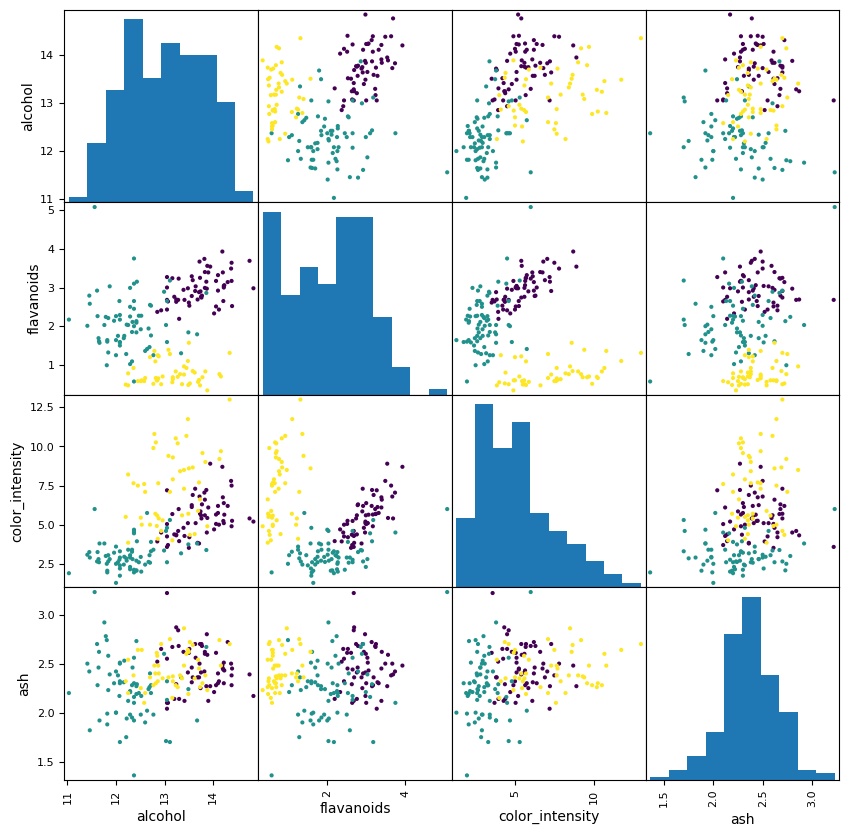

In [39]:
pd.plotting.scatter_matrix(df_wine[selected_features], alpha=1, figsize=(10, 10), c=y)

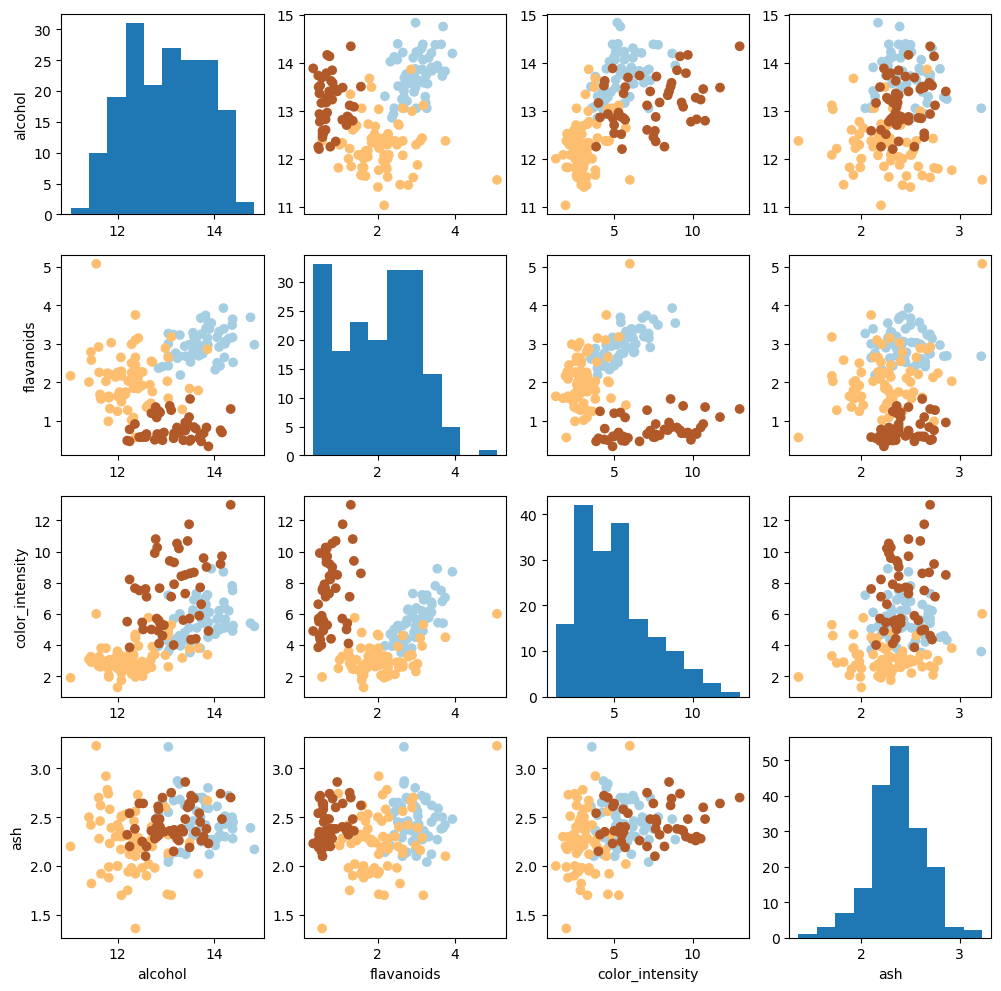

In [40]:
def myplotGrid(X, labels):
    dim = len(selected_features) + 1
    fig = plt.figure(figsize=(12, 12))
    plot_indx = 1
    for row in range(1, dim):
        row_feature_name = selected_features[row - 1]
        for col in range(1, dim):
            data_row = row - 1
            data_col = col - 1
            col_feature_name = selected_features[data_col]
            ax = fig.add_subplot(4, 4, plot_indx)
            if row == col:
                ax.hist(X[:, data_row])
            else:
                ax.scatter(X[:, data_col], X[:, data_row], c=y, cmap=plt.cm.Paired)

            if row == dim - 1:
                ax.set_xlabel(col_feature_name)
            if col == 1:
                ax.set_ylabel(row_feature_name)

            plot_indx += 1


myplotGrid(X, "Scatter matrix by features")


In [41]:
# initialize random seed to replicate results over different runs
mySeed = 12345
np.random.seed(mySeed)
XN = X + np.random.normal(0, 0.6, X.shape)

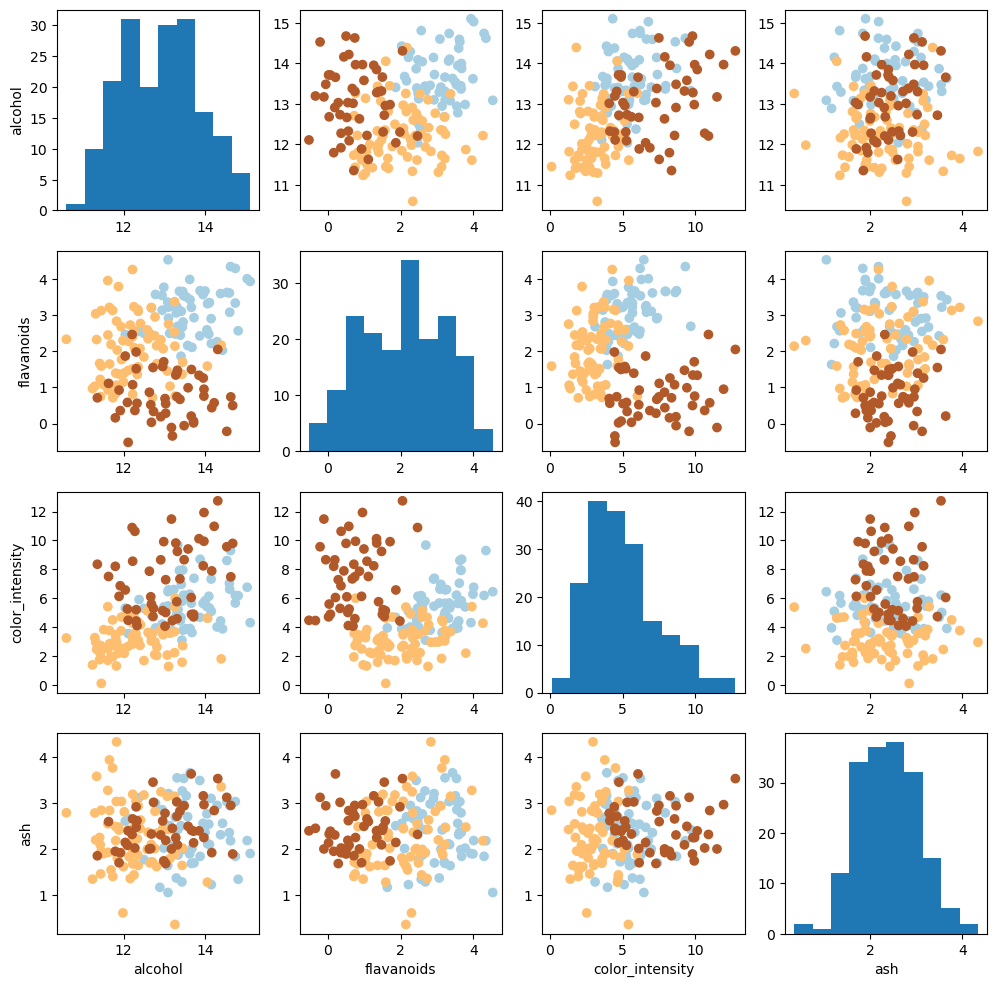

In [42]:
myplotGrid(XN, 'Noisy')

Q1. Exploratory data analysi

Feature selection is primarily focused on removing non-informative or redundant predictors from the model.
So we need to understand what features are the most relevant
Examine the scatter plots to identify patterns or separability between classes. 
We need to Look for clusters, distinct regions, or trends that suggest a feature's importance in distinguishing classes.
For instance, color_intensity and flavanoids ? may be considered more relevant for classification.


Q2. Data with noise

In this particular case, noise didn't skew the picture too much. Real life data is always noise. 

2. Implementing kNN

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("true values          ", y_test)  # true values
print("predicted by sklearn ", y_pred)  # predicted values

true values           [2 2 0 0 1 2 2 1 2 0 2 1 2 2 2 0 1 2 2 1 0 2 0 1 1 0 0 1 1 2 1 0 0 2 2 1]
predicted by sklearn  [2 2 0 0 0 2 2 1 2 0 2 1 2 2 2 0 1 2 2 1 0 2 0 1 1 0 0 1 0 2 1 0 0 2 2 1]


In [46]:
class MyKNearestNeighborsClassifier:
    pass

    def __init__(self, k):
        self.k = self.__validate_k(k)
        self.x_train = None
        self.y_train = None

    def fit(self, x_train, y_train):
        # np.unique(y) # classes
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        predicted_points = []
        for test_x_point in x_test:
            predicted_points.append(self.__predict_class(test_x_point))
        return np.array(predicted_points)

    def __predict_class(self, x_point):
        distances = []
        # calculate distances to all the training points
        for x_train_point in X_train:
            distances.append(self.__euclidean(x_train_point, x_point))

        nearest_indexes = np.argsort(distances)[:self.k]  # sort distances, take k nearest points' indices
        nearest_classes = self.y_train[nearest_indexes]  # take their classes
        # count number of occurrences of a class and return the index of max counter.
        return np.bincount(nearest_classes).argmax()

    def __euclidean(self, point1, point2):
        distance = np.sum(np.square(point1 - point2))
        return np.sqrt(distance)

    def __validate_k(self, k):
        if k <= 0:
            raise Exception("K cannot be less or equal to zero")

        k += 1  # Ties can be broken consistently by expanding K by 1
        return k


knn = MyKNearestNeighborsClassifier(10)
knn.fit(X_train, y_train)
my_y_pred = knn.predict(X_test)
print("true values          ", y_test)  # true values
print("predicted by sklearn ", y_pred)  # predicted values
print("predicted by me      ", my_y_pred)  # predicted values

true values           [2 2 0 0 1 2 2 1 2 0 2 1 2 2 2 0 1 2 2 1 0 2 0 1 1 0 0 1 1 2 1 0 0 2 2 1]
predicted by sklearn  [2 2 0 0 0 2 2 1 2 0 2 1 2 2 2 0 1 2 2 1 0 2 0 1 1 0 0 1 0 2 1 0 0 2 2 1]
predicted by me       [2 2 0 0 0 2 2 1 2 0 2 1 2 2 2 0 1 2 2 1 0 2 0 1 1 0 0 1 0 2 1 0 0 2 2 1]
